# Reddit Clustering

For this project, we set to explore the topography of reddit. We wanted to see what subreddits are commonly used between users, if there are communities of users that act as links between subreddits, and if there are subreddits isolated from the main usern network of Reddit.

## Research Question

We are interested in clustering subreddits, by using comment and submission data to discern connections between subreddits and the users who are active in them. We are hoping to see similar userbases in subreddits we did not expect, along with disconnects in userbases between subreddits that appear intuitively similar. We want to use a Clustering algorithm to connect subreddits in space, and then calculate the distance between subreddits.

## Data Sources

All of our data is coming from reddit. Reddit submission and comment data is publicly accessible, and reddit has a nice API structure. We are using the package PRAW (python reddit api wrapper), which makes the reddit api calls easier to use and python importable. We are attempting to build subreddit comment vectors for a large number of reddit users. We would like to create nested dictionaries, the first level key being a reddit user, the second level keys being a subreddit name, and the values being how many time that specific user posted to a specific subreddit. 

Another important note is there are two kinds of ways to post to reddit, and the api distinguishes them. There are submissions and comments. Submissions are posts including an image, a video, or a question, and comments are replies and follow-ups to posts. Both kinds of posts on reddit are useful for the clustering we want to do, so we must do both.

We split our data scripts into differen pieces, below is the documentation for each script, followed by the code. 

Also to gather any data from Reddit we must log on to the system with a developer id and create a reddit instance in our code. This happens once below.

In [1]:
import praw
import pandas as pd
import sys

reddit = praw.Reddit(client_id='tc_fFbWZrkDSRw',
                     client_secret='fTq7nFVzdkCHFZY7jWQvHmkLpwk',
                     user_agent='lhimelman')

# userNameScraper.py:
  *A Scraper that gets just usernames, does it very quickly. 6000 usernames can be collected in a few minutes*

  EX: 
      
      
      python3 userNameScraper.py *saveFilename* *ListofSubreddit* *numberofpoststolookat*
      
      python3 userNameScraper.py data.txt funny,pics,todayilearned 100

In [2]:
def scrapeUsers(reddit, subredditList, postNum):
    subnum = 0
    for subredditname in subredditList:
        users = []
        posts = reddit.subreddit(subredditname).hot(limit=postNum)
        pc = 0
        for submission in posts:
            all_comments = submission.comments.list()
            for c in all_comments:
                try:
                    name = c.author.name
                    if name not in users:
                        users.append(name)
                except:
                    pass
            pc = pc + 1
            print( pc, "post")
        subnum = subnum + 1
        print( subnum, "subreddit")
    return users

##An example call scraping one post from r/funny
users = scrapeUsers(reddit,['politics'],1)
users

1 post
1 subreddit


['TrumpImpeachedAugust',
 'zaikanekochan',
 'mmaireenehc',
 'IMAVINCEMCMAHONGUY',
 'dallasmorningnews',
 'BrokenZen',
 'Thoramel',
 'ivsciguy',
 'ArtysFartys',
 'metaldood19',
 'ExRays',
 'jimbozak',
 'hammersklavier',
 'verifex',
 'Hoplophilia',
 'sadist-trombone',
 'Metallic144',
 'caravaggio2000',
 'DoingRandomCrap31',
 'JuDGe3690',
 'worldwarli',
 'HorrorSquirrel1',
 'Amazing_Archigram',
 'beswin',
 'ballmermurland',
 'darkskinnedjermaine',
 'hawkiron',
 'galleyest',
 'Firechess',
 'DanielTigerUppercut',
 'AsperonThorn',
 'Vernacularry',
 'highorderdetonation',
 'aoi_to_midori',
 'Markanaya',
 'ashycharasmatic',
 'Music_Tech',
 'Baltron9000',
 'Sporian',
 'bo_dingles',
 '0and18',
 'fascist___hag',
 '10iss',
 'narwhilian',
 'hideous_coffee',
 'BeachJas',
 'iSpoonz',
 'd9_m_5',
 'stasbukh',
 'subpargalois',
 'serothis',
 'not_even_once_okay',
 'StuStutterKing',
 'Prometheus_II']

# ScrapeFreqfromUser.py:
  *A scraper that gets frequencies of comments from a list of users*

  EX: 
    
        python3 ScrapeFreqfromUser.py *savefielName* *userlistfilename*
     
    
        python3 ScrapeFreqfromUser.py freq.txt users.txt

In [3]:
def scrapeSubreddit(reddit, users):
    commentFreq = {}
    headers = []
    usernum = 1
    for user in users:
        userCFreq = {}
        for comment in reddit.redditor(user).comments.new(limit=None):
            sub = comment.subreddit
            if sub not in userCFreq:
                userCFreq[sub] = 1
            else:
                userCFreq[sub] += 1
            if sub not in headers:
                headers.append(sub)
        commentFreq[user] = userCFreq
        usernum = usernum + 1
        print(usernum, "out of", len(users))
    return commentFreq,headers

##An example call scraping the users gotten above
cfreq,headers = scrapeSubreddit(reddit, users[0:3])
df = pd.DataFrame.from_dict(data=cfreq, orient='index').fillna(0)
df

2 out of 3
3 out of 3
4 out of 3


,GamePhysics,ScottishPeopleTwitter,politics,mildlyinteresting,AskReddit,westworld,vermont,ChineseLanguage,Showerthoughts,Futurology,...,dadjokes,rarepuppers,gifsthatkeepongiving,Otterable,ThisAmericanLife,OCCaliPokemonGo,gradadmissions,nycmeetups,TrueOffMyChest,cscareerquestions
TrumpImpeachedAugust,3.0,3.0,800,2.0,1,1.0,13.0,22.0,1,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmaireenehc,0.0,0.0,50,0.0,6,0.0,0.0,0.0,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,7.0,4.0,1.0
zaikanekochan,0.0,0.0,270,10.0,11,0.0,0.0,0.0,3,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ScrapeSubFreqfromUser.py:
  *A scraper that gets frequencies of submissions from a list of users*

  EX: 
    
        python3 ScrapeSubFreqfromUser.py *savefielName* *userlistfilename*
     
    
        python3 ScrapeSubFreqfromUser.py freq.txt users.txt

In [4]:
def scrapeSubreddit(reddit, users):
    subFreq = {}
    headers = []
    usernum = 1
    for user in users:
        userCFreq = {}
        for submission in reddit.redditor(user).submissions.new(limit=None):
            sub = submission.subreddit
            if sub not in userCFreq:
                userCFreq[sub] = 1
            else:
                userCFreq[sub] += 1
            if sub not in headers:
                headers.append(sub)
        subFreq[user] = userCFreq
        usernum = usernum + 1
        print(usernum, "out of", len(users))
    return subFreq,headers

subfreq,headers = scrapeSubreddit(reddit, users[0:3])
df = pd.DataFrame.from_dict(data=subfreq, orient='index').fillna(0)
df

2 out of 3
3 out of 3
4 out of 3


,cursedimages,GamePhysics,reactiongifs,politics,Birds_Stealing_Things,Overwatch,CatsStandingUp,shittyreactiongifs,HappyCakeDayClub,LifeProTips,...,mildlyinfuriating,pokemon,tattoos,gaming,berkeley,howyoudoin,PandR,SouthBayLA,electricdaisycarnival,arresteddevelopment
TrumpImpeachedAugust,1.0,1.0,1.0,192.0,5.0,6.0,1.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmaireenehc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
zaikanekochan,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


At this point, we have two sparse matrices in which each column is a vector for an individual subreddit that contains frequencies of different users posting to or commenting on that subreddit.

***
The above calls are examples of running our scripts, but of course our actual data sets, (which we only want to pull down once), are much larger.
***

## Data Cleaning

The data came to us pretty clean. Reddit's api allows us to filter deleted comments and such. Our data cleaning and preprocessing included three different tasks. Below is the first 100 rows of our large table, and then a description of each task. 

In [5]:
bigdf = pd.read_csv('../data.csv',nrows=100)
bigdf

,Unnamed: 0,cocktails,AskReddit,videos,hearthstone,PUBATTLEGROUNDS,dontdeadopeninside,CompetitiveHS,funny,TWWPRDT,...,firefall,KUFIIOnline,atlantar4r,HeadBangToThis,Kochen,aachen,KnitRequest,petplay,Balls,peachfuzz
0,--abadox--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,--arete--,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-COPBLOCK-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-Chakas-,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-DisobedientAvocado-,0.0,61.0,0.0,0.0,0.0,0.0,0.0,24.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-Enrique_Shockwave-,0.0,3.0,0.0,2.0,0.0,40.0,0.0,50.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-FuckYourGod,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-KyloRen,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-Mateo-,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-Meik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task One:
    
    Create a method for removing very sparse vectors from our dataset. In looking through the data, we realized that there are some subreddits with really very few posts, that appears in our set of vectors without really doing anything. We decided to test clustering with the whole set and with smaller sets, so we made a way of thresholding how many posts a subreddit needs to be oncluded

In [6]:
Threshold = 1000

def delSparse(df, threshold):
    for c in list(df)[1:]:
        if sum(list(df[c])) < Threshold:
            del df[c]
            
delSparse(bigdf,Threshold)
print(bigdf)

              Unnamed: 0  funny  TWWPRDT  Damnthatsinteresting  Overwatch  \
0             --abadox--   56.0     67.0                   0.0       49.0   
1              --arete--    7.0      7.0                   6.0        1.0   
2             -COPBLOCK-    0.0      1.0                   1.0        0.0   
3               -Chakas-    0.0     60.0                  11.0       15.0   
4   -DisobedientAvocado-   24.0     14.0                  46.0       38.0   
5    -Enrique_Shockwave-   50.0     30.0                   0.0        1.0   
6           -FuckYourGod    0.0     39.0                  48.0       76.0   
7               -KyloRen    5.0     14.0                   7.0        1.0   
8                -Mateo-    2.0      3.0                   6.0        4.0   
9                  -Meik    0.0      2.0                   0.0        0.0   
10           -Moonchild-    0.0     35.0                   3.0       31.0   
11         -Mr_Rogers_II   30.0      1.0                  11.0        2.0   

# Task Two:
    Format data so it is in the form expected by the clustering algorithm. The following code takes the dataframe and changes it to a numpy array. The code also saves a list of headers for referencing specific nodes in a cluster later.
    
    

In [7]:
from numpy import array

def changetoVec(df):
    vectors = []
    for c in list(df)[1:]:
        vectors.append(list(df[c]))

    return array(vectors)

bigdfVec = changetoVec(bigdf)
print(bigdfVec[0:10,0:14])

[[ 56.   7.   0.   0.  24.  50.   0.   5.   2.   0.   0.  30.   1.   0.]
 [ 67.   7.   1.  60.  14.  30.  39.  14.   3.   2.  35.   1.   9.   1.]
 [  0.   6.   1.  11.  46.   0.  48.   7.   6.   0.   3.  11.   0.   2.]
 [ 49.   1.   0.  15.  38.   1.  76.   1.   4.   0.  31.   2.   1.   0.]
 [ 54.   4.   1.   1.   6.  15.   0.   2.   3.   0.   0.  23.   0.   0.]
 [  0.  10.   0.  13.  14.   4.   0.   1.  10.   0.   4.  25.   5.   0.]
 [  1.  27.   0.  21. 119. 119. 507.   4.   3.   1.   4.  19.  26.   0.]
 [  0.   4.   0.  22.  33.  29.   0.  12.  38.   1.   0.  22.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 671.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   3.   0.   0.   0.   0.   0.   0.]]


# Task Three:
    Remove Porn. What we discovered is that most porn subreddits fell under the category of incredibly sparse vectors, and so were removed, the ones that didn't we decided to include in our analysis for now. 

## Try clustering:

In [8]:
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

def Cluster(vectors, Num_clusters):
    whitened = whiten(vectors)
    codebook, distortion = kmeans(whitened, Num_clusters)
    return codebook, distortion

cb, dist = Cluster(bigdfVec[1:1000],3)

print(cb)
print(dist)


[[2.482049   0.88723595 2.12132034 3.42073744 0.39796574 0.82893876
  0.25129512 2.93420253 0.26842096 2.91998558 0.16806974 0.09752696
  1.10575697 1.5        2.85693805 3.27028823 0.7908746  1.89211799
  0.71180592 2.51008194 0.16216728 3.20996681 0.38557449 1.75638163
  0.64076824 1.11325671 0.26762342 0.70929937 0.13087065 2.53436798
  0.08525066 1.42784245 3.2263555  2.70455403 0.13416408 1.56312135
  2.78394373 1.02617564 0.43101496 0.04322651 1.52661805 0.51918277
  0.36888654 1.66486517 1.33343496 0.9861633  0.27992493 3.26923627
  2.76948595 2.05788983 3.31997753 0.58104633 1.20619734 3.18198052
  1.14300114 3.29358568 1.31141588 2.9292505  1.75245258 0.67082039
  2.38252368 1.1803494  3.20431048 3.19717032 3.         1.00695122
  3.18198052 0.34575626 0.45574725 0.72574583 0.7021292  3.21653803
  0.16646883 1.03293391 0.4000988  1.98657146 3.08572702 3.25748818
  0.00837538 3.28839403 3.35714286 2.41506399 0.18230597 2.83646212
  2.81270667 2.40535118 1.90756352 0.09759459 3.

# Data Visualization

## Bar Graph

What are the most commented on subreddits from out sample?

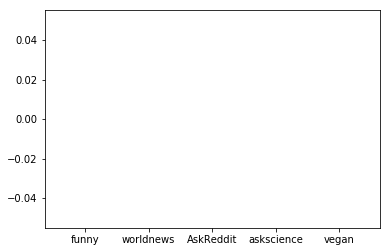

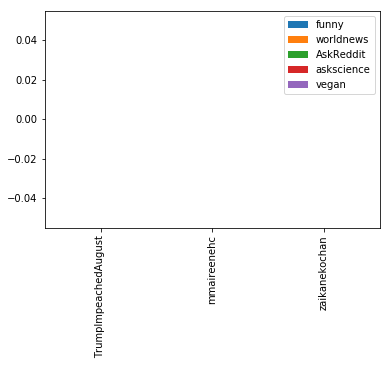

In [9]:
#from collections import Counter
    
new_data = pd.DataFrame(df, columns = ['funny', 'worldnews', 'AskReddit', 'askscience', 'vegan'])
#new_data

sums = {}
for c in new_data:
    sums[c] = new_data[c].sum()
sums

plt.bar(range(len(sums)), list(sums.values()), align = 'center')
plt.xticks(range(len(sums)), list(sums.keys()))

new_data.plot.bar()

## Scatter Plot

Number of subreddits commented on vs total number of posts for a user

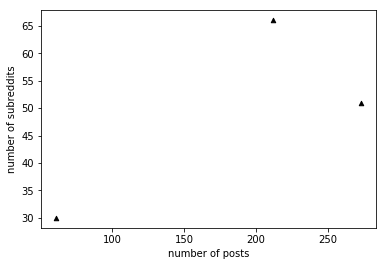

In [10]:
import scipy

df["total_posts"] = df.sum(axis=1)
df["total_posts"] = df["total_posts"].astype(int)


    
total_subreddits = []
for i in range(0, len(df.index)):
    subreddits = 0
    for j in range(1,len(df.columns)-1):
        if df.iat[i,j] != 0.0:
            subreddits += 1
    total_subreddits.append(subreddits)
  
df["total_subreddits"] = total_subreddits       
            

plt.scatter(df.total_posts,df.total_subreddits, color='k', s=20, marker="^")
plt.xlabel('number of posts')
plt.ylabel('number of subreddits')
plt.show()


## Line graph

Is reddit user posting a normal distribution?

ValueError: skewtest is not valid with less than 8 samples; 3 samples were given.

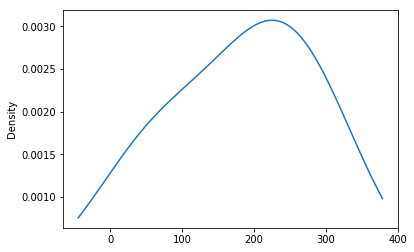

In [11]:
df["total_posts"].plot(kind="density")
scipy.stats.normaltest(df["total_posts"])

The number of posts reddit users make is not nearly a normal distribution. There are lots of people with almost no posts, and lots of users with tons of posts, and a large drop inbetween.There is no consistent distribution of how may posts a reddit user makes.